# Student ID: 2312516









Let's install all require libraries. For example, `transformers`

In [3]:
!pip install transformers
!pip install nltk
!pip install seaborn --upgrade
!pip install -U -q PyDrive
!pip install numpy scikit-learn imbalanced-learn
!pip install PyDrive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Let's import all require libraries.
For example, `numpy`

In [4]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from tqdm import tqdm
import pickle
from wordcloud import WordCloud
from collections import Counter
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk import pos_tag
import numpy as np
import os
import torch
import torch.nn as nn
from torch import optim
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from torch.utils.data import TensorDataset, DataLoader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import torch.optim as optim
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import joblib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import shutil
import requests
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Let's put your student id as a variable, that you will use different places**

In [5]:
student_id = 2312516 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [6]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes

In this section you will write all common codes, for examples


*   Data read
*   Command Line argument reading
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 12345670

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-24-SP/Lab10/’ in your GDrive

now set all global variable,


Sample output directory and file structure: https://drive.google.com/drive/folders/1okgSzgGiwPYYFp7NScEt9MNVolOlld1d?usp=share_link   

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CE807-24-SP/Assignment/2312516/'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '6') # Make sure to replace 0 with last digit of your student Regitration number
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)


MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model', str(student_id)) # Make sure to use your student Regitration number
MODEL_Gen_DIRECTORY = os.path.join(MODEL_PATH, 'Model_Gen') # Model Generative directory
print('Model Generative directory: ', MODEL_Gen_DIRECTORY)

MODEL_Gen_File = MODEL_Gen_DIRECTORY + '.zip'


MODEL_Dis_DIRECTORY = os.path.join(MODEL_PATH, 'Model_Dis') # Model Discriminative directory
print('Model Discriminative directory: ', MODEL_Dis_DIRECTORY)

MODEL_Dis_File = MODEL_Dis_DIRECTORY + '.zip'


List files:  ['Copy of code.ipynb', 'preprocessed_data', 'data', 'test.csv', 'model']
Train file:  gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/train.csv
Validation file:  gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/valid.csv
Test file:  gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test.csv
Model Generative directory:  gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen
Model Discriminative directory:  gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis


Let's see train file

In [8]:
train_df = pd.read_csv(train_file)
val_df = pd.read_csv(val_file)
test_df = pd.read_csv(test_file)


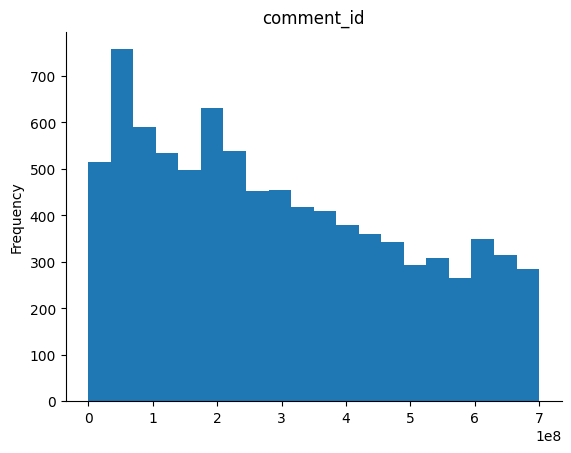

In [9]:
# @title comment_id

from matplotlib import pyplot as plt
train_df['comment_id'].plot(kind='hist', bins=20, title='comment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

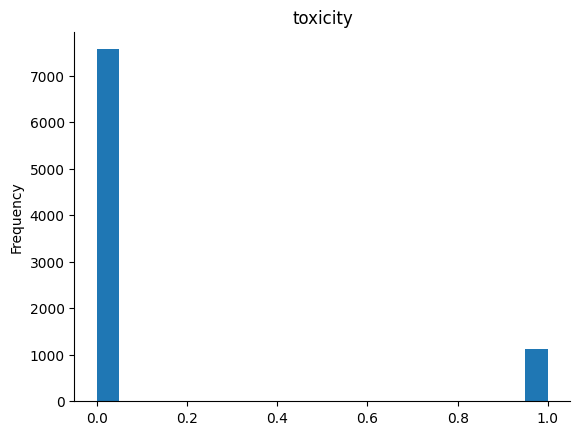

In [ ]:
# @title toxicity

from matplotlib import pyplot as plt
train_df['toxicity'].plot(kind='hist', bins=20, title='toxicity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Let's show you a sample output file. Notice all fields, `out_label` is your model's output for that `tweet` and `id`

We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

In [9]:

def compute_performance(y_true, y_pred):
    """
    Prints different performance metrics like Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also displays the Confusion Matrix with proper X & Y axis labels.
    Returns the F1 score (macro).

    Args:
        y_true (list or numpy.array): True labels.
        y_pred (list or numpy.array): Predicted labels.

    Returns:
        float: F1 score (macro).
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall (Macro): {recall:.4f}")
    print(f"Precision (Macro): {precision:.4f}")
    print(f"F1 Score (Macro): {f1:.4f}")

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Positive', 'Negative'],
                yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return f1



# Data Visualization
**Note:** This was taken from my own NLE assignment along with the data visualization (I will include that assignment with the folder)

Average word length: 6.061695169319794
Average sentence length: 33.79330957581331


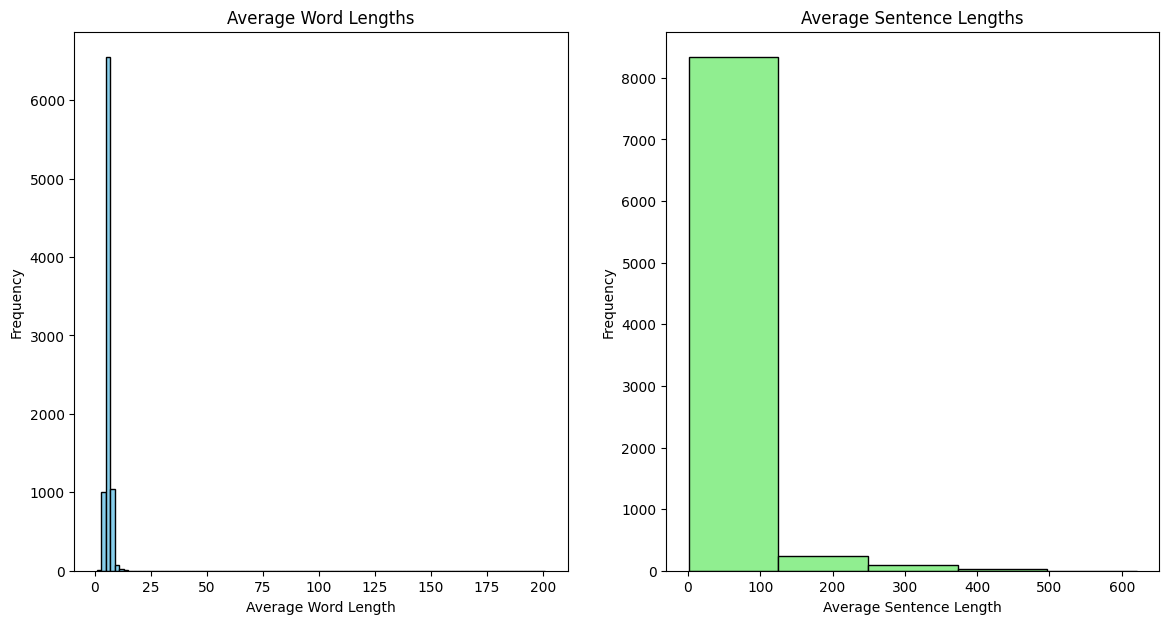

POS counts:
NN      131252
JJ       58194
RB       19383
VBD      13178
VBG      12799
VBP      12274
VB       10150
VBN       8287
NNS       7426
IN        5894
MD        3862
CD        2688
VBZ       2416
NNP       1334
JJS        884
DT         745
JJR        713
RBR        583
FW         529
PRP        299
CC         261
RP         187
WP         123
WDT        116
WRB        102
EX          85
WP$         49
UH          48
RBS         48
TO          41
PRP$        11
SYM          4
POS          3
Name: count, dtype: int64


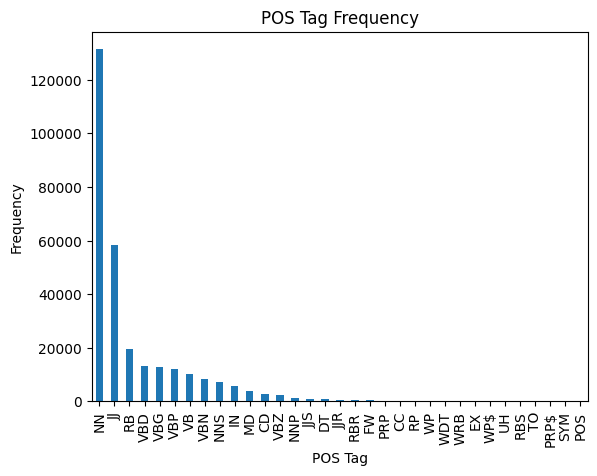

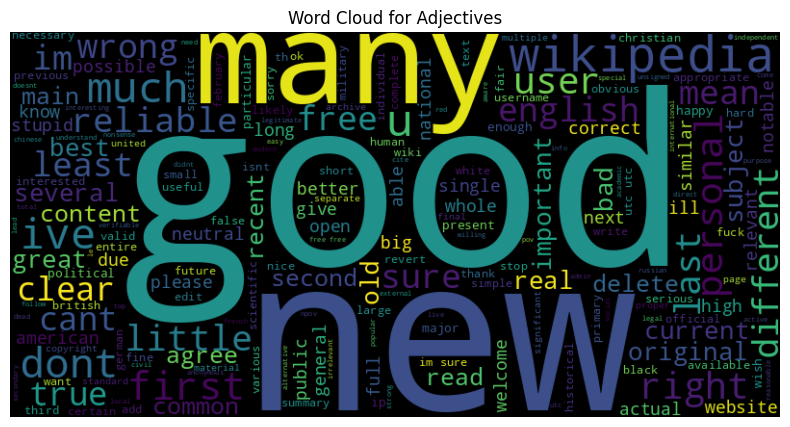

Most common words: [('article', 4208), ('page', 2993), ('wikipedia', 2102), ('please', 1735), ('would', 1636), ('like', 1620), ('one', 1600), ('dont', 1326), ('source', 1202), ('know', 1187)]
Most common bigrams: [(('talk', 'page'), 763), (('teabag', 'teabag'), 620), (('would', 'like'), 235), (('speedy', 'deletion'), 230), (('penis', 'penis'), 196), (('reliable', 'source'), 178), (('feel', 'free'), 151), (('blocked', 'editing'), 142), (('please', 'stop'), 138), (('dont', 'know'), 137)]


In [9]:

def analyze_text_data(file_path):
    """
    Analyze text data from a CSV file containing cleaned sentences and labels.

    This function performs the following tasks:
    1. Reads a CSV file into a DataFrame.
    2. Calculates and plots the average word and sentence lengths.
    3. Performs POS tagging on the words and plots the frequency of each POS tag.
    4. Generates a word cloud for adjectives.
    5. Calculates and prints frequency distributions for words and bigrams.

    Args:
    file_path (str): The path to the CSV file containing the 'Cleaned_Sentence' column.

    Returns:
    None
    """

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure text data is in string format
    df['Cleaned_Sentence'] = df['Cleaned_Sentence'].astype(str)

    # Extract words and sentences
    words = [review.split() for review in df['Cleaned_Sentence']]
    sentences = [review.split('.') for review in df['Cleaned_Sentence']]  # Splitting by '.' might not be accurate always

    # Calculate average word and sentence lengths
    average_word_length = [sum(len(word) for word in review) / len(review) if review else 0 for review in words]
    average_sentence_length = [sum(len(sent.split()) for sent in review) / len(review) if review else 0 for review in sentences]

    # Calculate mean values
    print(f"Average word length: {pd.Series(average_word_length).mean()}")
    print(f"Average sentence length: {pd.Series(average_sentence_length).mean()}")

    # Convert to pandas Series for plotting
    awl_series = pd.Series(average_word_length)
    asl_series = pd.Series(average_sentence_length)

    # Plotting histograms
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].hist(awl_series, bins=100, color='skyblue', edgecolor='black')
    ax[0].set_title('Average Word Lengths')
    ax[0].set_xlabel('Average Word Length')
    ax[0].set_ylabel('Frequency')
    ax[1].hist(asl_series, bins=5, color='lightgreen', edgecolor='black')
    ax[1].set_title('Average Sentence Lengths')
    ax[1].set_xlabel('Average Sentence Length')
    ax[1].set_ylabel('Frequency')
    plt.show()

    # Flatten the lists for POS tagging
    all_words = [word for sublist in words for word in sublist]

    # Apply POS tagging
    pos_tags = pos_tag(all_words)

    # Count the frequency of each part of speech
    pos_counts = pd.Series([tag for word, tag in pos_tags]).value_counts()
    print("POS counts:")
    print(pos_counts)

    # Plot a bar graph for POS tags
    pos_counts.plot(kind='bar', title='POS Tag Frequency')
    plt.xlabel('POS Tag')
    plt.ylabel('Frequency')
    plt.show()

    # Create a word cloud for adjectives
    adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(adjectives))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Adjectives')
    plt.show()

    # Frequency distribution for words
    fdist_words = FreqDist(all_words)
    print("Most common words:", fdist_words.most_common(10))

    # Frequency distribution for bigrams
    bigrams = ngrams(all_words, 2)
    fdist_bigrams = FreqDist(bigrams)
    print("Most common bigrams:", fdist_bigrams.most_common(10))

# Run the function
analyze_text_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/preprocessed_train_text.csv')


# Save Model

In [10]:

def save_model(model,model_dir):
  """
    Saves the specified model to a file within the provided directory. The function
    checks if the directory exists, creates it if necessary, and then saves the model
    to a file named 'model.sav' within that directory.

    Args:
        model: The model object to be saved. This could be any Python object that
               is compatible with `pickle`.
        model_dir (str): The directory path where the model file will be saved. If the
                         directory does not exist, it will be created.

    Returns:
        str: The full path to the saved model file.

    Raises:
        OSError: If there is an error creating the directory or saving the file.

  """
  # save the model to disk
  # Check if the Model directory exists


  if not os.path.exists(model_dir):
      # Create the directory if it doesn't exist
      os.makedirs(model_dir)
      print(f"Directory '{model_dir}' created successfully.")
  else:
      print(f"Directory '{model_dir}' already exists.")

  model_file = os.path.join(model_dir, 'model.sav')
  pickle.dump(model, open(model_file, 'wb'))

  print('Saved model to ', model_file)

  return model_file


# Load Model

In [11]:

def load_model(model_file):
    # load model from disk

    # Note you might have to modify this based on your requirement

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    return model

# Let's download GDrive Link into a directory

In [12]:


def extract_file_id_from_url(url):
    # Extract the file ID from the URL
    file_id = None
    if 'drive.google.com' in url:
        file_id = url.split('/')[-2]
    elif 'https://docs.google.com' in url:
        file_id = url.split('/')[-1]

    return file_id

def download_file_from_drive(file_id, file_path):
    # Construct the download URL
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Download the file
    response = requests.get(download_url)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully!",file_path)
    else:
        print("Failed to download the file.")

def download_zip_file_from_link(file_url,file_path):

  file_id = extract_file_id_from_url(file_url)
  if file_id:
      download_file_from_drive(file_id, file_path)
  else:
      print("Invalid Google Drive URL.")


# Zip and Unzip a GDrive File

In [13]:

# Function to zip a directory
def zip_directory(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(directory, '..')))
        print('Created a zip file',zip_filename)

# Function to unzip a zip file
def unzip_file(zip_filename, extract_dir):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print('Extracted a zip file to',extract_dir)

# Example usage:
# directory_to_zip = 'path/to/your/directory'
# zip_filename = 'output_zipfile.zip'

# # Zip the directory
# zip_directory(directory_to_zip, zip_filename)

# # Unzip the zip file
# extract_dir = 'path/to/extract'
# unzip_file(zip_filename, extract_dir)


# Get Sharable link of your Zip file in Gdrive

In [14]:

def get_gdrive_link(file_path):
    # Authenticate and create PyDrive client
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Find the file in Google Drive
    file_name = file_path.split('/')[-1]
    file_list = drive.ListFile({'q': f"title='{file_name}'"}).GetList()

    # Get the file ID and generate the shareable link
    if file_list:
        file_id = file_list[0]['id']
        gdrive_link = f"https://drive.google.com/file/d/{file_id}/view?usp=sharing"
        return gdrive_link
    else:
        return "File not found in Google Drive"

def get_shareable_link(url):

    file_id = extract_file_id_from_url(url)

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    try:
        file_obj = drive.CreateFile({'id': file_id})
        file_obj.FetchMetadata()
        file_obj.InsertPermission({
            'type': 'anyone',
            'value': 'anyone',
            'role': 'reader'
        })

        # Get the shareable link
        return file_obj['alternateLink']
    except Exception as e:
        print("Error:", e)
        return None

# if __name__ == "__main__":
#     # Replace 'YOUR_FILE_ID' with the ID of the file you want to share
#     file_id = 'YOUR_FILE_ID'
#     shareable_link = get_shareable_link(file_id)
#     if shareable_link:
#         print("Shareable link:", shareable_link)
#     else:
#         print("Failed to generate shareable link.")


# Process Data

In [15]:

class TextProcessingPipeline:
    """
    A text processing pipeline that cleans, tokenizes, and converts text data
    from CSV files for NLP tasks, such as input to an LSTM model.

    Attributes:
        word2idx (dict): A dictionary mapping words to their indices in the vocabulary.
        idx2word (dict): A dictionary mapping indices in the vocabulary back to words.
        words (Counter): A Counter object tracking the frequency of each word in the processed data.
    """

    def __init__(self):
        """
        Initializes the text processing pipeline with empty mappings and word frequencies.
        """
        self.word2idx = {}
        self.idx2word = {}
        self.words = Counter()

    def load_data(self, filename):
        """
        Loads and extracts comments and their toxicity labels from a CSV file.

        Parameters:
            filename (str): The path to the CSV file containing the data.

        Returns:
            list of tuples: A list where each tuple contains (comment, toxicity).
        """
        df = pd.read_csv(filename, usecols=['comment', 'toxicity'])
        # Convert labels according to specified encoding, ensure they are floats
        df['toxicity'] = df['toxicity'].apply(lambda x: 1.0 if x == 1 else 0.0)
        return list(zip(df['comment'], df['toxicity']))

    def load_data_test(self, filename):
        """
        Loads and extracts comments from a CSV file containing additional columns specific to testing.
          This method focuses on the 'comment' column only.

          Parameters:
              filename (str): The path to the CSV file containing the data.

          Returns:
              list of str: A list of comments extracted from the CSV file.
         """
        df = pd.read_csv(filename, usecols=['comment'])  # Load only the 'comment' column
        return df['comment'].tolist()


    def clean_text(self, text):
        """
        Cleans a single piece of text, including removing HTML tags, specific prefixes,
        newline tokens, lowering case, removing punctuation, tokenizing, removing stopwords,
        and lemmatizing.

        Parameters:
            text (str): The text string to clean.

        Returns:
            str: A cleaned, tokenized, and lemmatized string.
        """
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove 'SDATA_6 :' and 'edata6', case-insensitive
        text = re.sub(r'sdata_6 :', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\bedata6\b', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\bedata\b', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\bedata\b|\bedata(?=\s|$)', '', text, flags=re.IGNORECASE)
        # Broad pattern to catch 'edata' with surrounding non-word characters
        text = re.sub(r'\W*edata\W*', '', text, flags=re.IGNORECASE)

        # Additional step to catch 'edata' that might be attached to other text without clear word boundaries
        text = re.sub(r'edata', '', text, flags=re.IGNORECASE)

        # Debug print to check if 'edata' is still present
        if 'edata' in text.lower():
         print(f"'edata' found after regex: {text}")  # Debug print
        # Replace 'NEWLINE_TOKEN' with a space and remove specific symbols
        text = re.sub(r'NEWLINE_TOKEN', ' ', text)
        # Remove URLs and email addresses
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
        # Lowercase
        text = text.lower()
        # Remove punctuation, numbers, and special characters
        text = re.sub(f'[{re.escape(string.punctuation)}' + r'►♥♪♫♦\d]', '', text)
        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        # Tokenization
        tokens = word_tokenize(text)
        # Lemmatization with stopwords removal
        lemmatizer = WordNetLemmatizer()
        clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
        # Return the cleaned text
        return ' '.join(clean_tokens)


    def process_data(self, dataset):
        """
        Processes a dataset by cleaning and tokenizing each comment.

        Parameters:
            dataset (list of tuples): The dataset to process, where each tuple is (comment, toxicity).

        Returns:
            (list, list): Two lists, one of the cleaned and tokenized comments, and the other of their corresponding labels.
        """
        cleaned_data = [(self.clean_text(comment), toxicity) for comment, toxicity in dataset]
        sentences, labels = zip(*cleaned_data)
        return list(sentences), list(labels)

    def tokenize_and_update(self, sentences):
        """
        Tokenizes sentences and updates the word frequency counter. This method is
        intended to build the vocabulary from the training set.

        Parameters:
            sentences (list of str): The sentences to tokenize.

        Returns:
            list of list of str: A list of sentences, where each sentence is a list of tokenized words.
        """
        updated_sentences = []
        for sentence in tqdm(sentences, desc="Tokenizing sentences"):
            tokens = regexp_tokenize(sentence, pattern="\s+", gaps=True)
            sentence_tokens = []
            for word in tokens:
                self.words.update([word.lower()])
                sentence_tokens.append(word)
            updated_sentences.append(sentence_tokens)
        return updated_sentences
    def pad_sentences(self, sentences_indices, max_length, pad_token=0):
        """
        Pads all sentences to the same length in a sequence of indices.
        Args:
            sentences_indices (list of list of int): List of sentences represented as indices.
            max_length (int): Maximum length of sentences after padding.
            pad_token (int): Index for <PAD> token to use for padding.
        Returns:
            list of list of int: Padded sentences represented as indices.
        """
        padded_sentences = []
        for sentence in sentences_indices:
            # Truncate the sentence if it's more than max_length
            if len(sentence) > max_length:
                padded_sentence = sentence[:max_length]
            else:
                # Else, pad the sentence
                padded_sentence = sentence + [pad_token] * (max_length - len(sentence))
            padded_sentences.append(padded_sentence)
        return padded_sentences
    def finalize(self):
        """
        Finalizes the vocabulary after processing all training sentences. Filters out
        infrequent words and creates word-to-index and index-to-word mappings.
        """
        self.words = {k: v for k, v in self.words.items() if v > 1}
        vocabulary = ['_PAD', '_UNK'] + sorted(self.words, key=self.words.get, reverse=True)
        self.word2idx = {w: i for i, w in enumerate(vocabulary)}
        self.idx2word = {i: w for i, w in enumerate(vocabulary)}

    def sentences_to_indices(self, sentences):
        """
        Converts sentences to sequences of indices based on the finalized vocabulary.

        Parameters:
            sentences (list of list of str): The sentences to convert, where each sentence is a list of words.

        Returns:
            list of list of int: A list of sentences, where each sentence is a list of word indices.
        """
        return [[self.word2idx.get(word.lower(), self.word2idx['_UNK']) for word in sentence] for sentence in tqdm(sentences, desc="Converting to indices")]




# Method Generative Start

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Generative Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

# Naive Bayes

Implementation is an adaptation from the following: https://github.com/MostafaEissa/Movie-Reviews-Sentiment-Analysis/blob/master/Movie%20Reviews%20Sentiment%20Classifier.ipynb

**Model Implementation & Training**

In [22]:
def train_Gen(train_file, val_file, model_dir):
    """
    Trains a Naive Bayes classifier on text data, using preprocessing, TF-IDF vectorization,
    SMOTE for handling class imbalance, and evaluates the performance on a validation set.

    Args:
        train_file (str): Path to the training dataset CSV file.
        val_file (str): Path to the validation dataset CSV file.
        model_dir (str): Directory path where the trained model will be saved.
    Returns:
        float: The macro F1 score of the model on the validation dataset.
    """

    # Ensure the model directory exists, create if not
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # Initialize the text processing pipeline
    pipeline = TextProcessingPipeline()

    # Load data from CSV files
    train_data = pipeline.load_data(train_file)
    val_data = pipeline.load_data(val_file)

    # Process data to extract sentences and their corresponding labels
    train_sentences, train_labels = pipeline.process_data(train_data)
    val_sentences, val_labels = pipeline.process_data(val_data)

    # Finalize the vocabulary after processing all text data
    # not useful here
    pipeline.finalize()

    # Initialize the TF-IDF vectorizer with a limit on the number of features
    vectorizer = TfidfVectorizer(max_features=30323)

    # Combine training and validation sentences to ensure a unified feature space
    all_sentences = train_sentences + val_sentences
    vectorizer.fit(all_sentences)

    # Convert text data into TF-IDF feature matrices
    X_train = vectorizer.transform(train_sentences)
    X_val = vectorizer.transform(val_sentences)

    # Initialize SMOTE with a fixed random state for reproducibility
    smote = SMOTE(random_state=student_id)
    # Apply SMOTE to the training data to handle class imbalance
    X_train_smote, y_train_smote = smote.fit_resample(X_train, train_labels)

    # Train a Naive Bayes classifier # with a specified alpha for smoothing
    nb_model = MultinomialNB(alpha = 0.1)
    nb_model.fit(X_train_smote, y_train_smote)

    # Predict labels for the validation dataset
    y_val_pred = nb_model.predict(X_val)

    # Compute performance metrics and display the confusion matrix
    f1_score_macro = compute_performance(val_labels, y_val_pred)

    # Save the trained Naive Bayes model to the specified directory
    model_path = os.path.join(model_dir, 'naive_bayes_model.pkl')
    joblib.dump(nb_model, model_path)

    # Save validation predictions
    val_results_df = pd.DataFrame({
        'Comment': val_sentences,
        'True_Label': val_labels,
        'Predicted_Label': y_val_pred
    })
    val_results_path = os.path.join(model_dir, 'validation_results_NB.csv')
    val_results_df.to_csv(val_results_path, index=False)
    print(f"Validation results saved to {val_results_path}")


    # Return the F1 score for further evaluation or logging
    return f1_score_macro


# Training using Naive Bayes

Accuracy: 0.6990
Recall (Macro): 0.5217
Precision (Macro): 0.5135
F1 Score (Macro): 0.5060


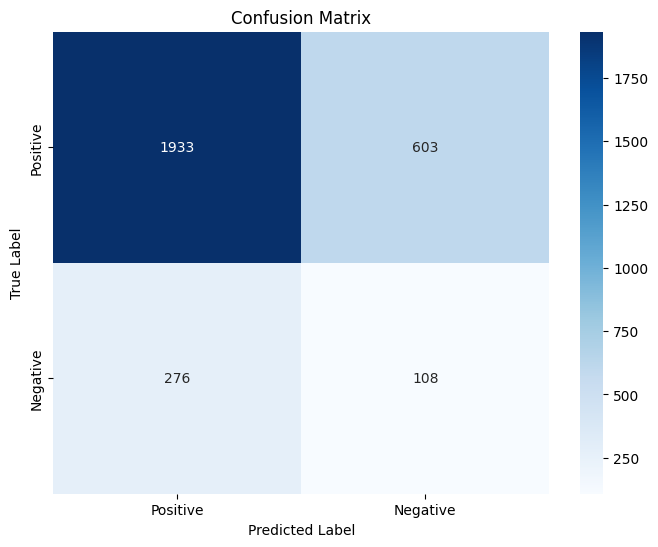

Validation results saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen/validation_results_NB.csv


In [23]:
train_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/train.csv'
val_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/valid.csv'
model_dir = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen'

# Train the model and get the F1 score
f1_score_macro = train_Gen(train_file, val_file, model_dir)

# Test Generative

In [20]:

def test_Gen(test_file, model_dir, output_file=None):
    """
    Loads a trained Naive Bayes model and a TF-IDF vectorizer, preprocesses the test data using the
    TextProcessingPipeline, predicts labels for the test dataset, and saves the updated test dataset with
    the 'out_label_model_gen' column updated with the predictions.

    Args:
        test_file (str): Path to the test CSV file.
        model_dir (str): Directory where the model and vectorizer are saved.
        output_file (str): Path to save the output CSV file with predictions. If None, updates the test_file directly.
    """
    # Load the trained model and vectorizer
    model_path = os.path.join(model_dir, 'naive_bayes_model.pkl')
    vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')

    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)

    # Initialize the text processing pipeline
    pipeline = TextProcessingPipeline()

    # Load the test data
    test_df = pd.read_csv(test_file)

    # Check for 'comment' column and process text data
    if 'comment' in test_df.columns:
        test_data = [(comment, 0) for comment in test_df['comment']]  # Dummy labels
        processed_sentences, _ = pipeline.process_data(test_data)  # Ignore dummy labels in output
    else:
        processed_sentences = []

    # Transform the test data using the loaded vectorizer
    X_test = vectorizer.transform(processed_sentences)

    # Predict using the loaded model
    predictions = model.predict(X_test)
    test_df['out_label_model_Gen'] = predictions  # Update the predictions column

    # Decide where to save the output file
    if output_file is None:
        output_file = test_file  # Optionally overwrite the original file

    # Save the updated DataFrame
    test_df.to_csv(output_file, index=False)
    print(f"Updated predictions saved to {output_file}")



In [21]:
test_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test.csv'
model_dir = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/Model_Gen'
output_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen/test.csv'

# Test the model and save predictions
test_Gen(test_file, model_dir, output_file)


Updated predictions saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/Model_Gen/test.csv


## Method Generative End


**LSTM Model**

Is an adaptation from the following repository & a part of the TextProcessingPipeline Class as well:
 https://github.com/kristianespina/LSTM-Sentiment-Analysis-of-Amazon-Reviews/blob/master/LSTM-Sentiment-Analysis.ipynb

In [ ]:


def train_LSTM(train_file, val_file, model_dir, preprocessed_dir=None, max_length=200):
    """
    Preprocess, train, and validate a model. Save both preprocessed text data and indexed sequences.
    Args:
        train_file (str): Path to the training file.
        val_file (str): Path to the validation file.
        model_dir (str): Directory to save the best model.
        preprocessed_dir (str): Optional; directory to save preprocessed text data and indexed sequences.
        max_length (int): Maximum number of tokens (words); more will be truncated, fewer will be padded.
    """

    # Set a default directory if not specified
    if preprocessed_dir is None:
        preprocessed_dir = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data'

    # Ensure the directories exist
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    if not os.path.exists(preprocessed_dir):
        os.makedirs(preprocessed_dir)

    # Initialize the text processing pipeline
    pipeline = TextProcessingPipeline()

    # Load, clean, and tokenize data
    train_data = pipeline.load_data(train_file)
    val_data = pipeline.load_data(val_file)

    # Process data to separate sentences and labels
    train_sentences, train_labels = pipeline.process_data(train_data)
    val_sentences, val_labels = pipeline.process_data(val_data)

    # Tokenize sentences and update word frequencies
    train_tokenized_sentences = pipeline.tokenize_and_update(train_sentences)
    val_tokenized_sentences = pipeline.tokenize_and_update(val_sentences)

    # Save the tokenized and cleaned sentences to CSV files
    pd.DataFrame({
        'Cleaned_Sentence': [' '.join(sentence) for sentence in train_tokenized_sentences],
        'Label': train_labels
    }).to_csv(f'{preprocessed_dir}/preprocessed_train_text.csv', index=False)

    pd.DataFrame({
        'Cleaned_Sentence': [' '.join(sentence) for sentence in val_tokenized_sentences],
        'Label': val_labels
    }).to_csv(f'{preprocessed_dir}/preprocessed_val_text.csv', index=False)

    # Finalize the vocabulary after all text is processed
    pipeline.finalize()

    # Add PAD token to the vocabulary if not present (added to the class but keep it just to make sure)
    pad_index = pipeline.word2idx.get('_PAD', None)
    if pad_index is None:
        pad_index = len(pipeline.word2idx)
        pipeline.word2idx['_PAD'] = pad_index

    # Convert tokenized sentences to sequences of indices
    train_sentences_indices = pipeline.sentences_to_indices(train_tokenized_sentences)
    val_sentences_indices = pipeline.sentences_to_indices(val_tokenized_sentences)

    # Pad sentences to a uniform length
    train_padded_sentences = pipeline.pad_sentences(train_sentences_indices, max_length, pad_token=pad_index)
    val_padded_sentences = pipeline.pad_sentences(val_sentences_indices, max_length, pad_token=pad_index)

    # Save padded sequences and labels for LSTM training
    with open(f'{preprocessed_dir}/train_padded_sentences.pkl', 'wb') as f:
        pickle.dump(train_padded_sentences, f)
    with open(f'{preprocessed_dir}/val_padded_sentences.pkl', 'wb') as f:
        pickle.dump(val_padded_sentences, f)
    with open(f'{preprocessed_dir}/train_labels.pkl', 'wb') as f:
        pickle.dump(train_labels, f)
    with open(f'{preprocessed_dir}/val_labels.pkl', 'wb') as f:
        pickle.dump(val_labels, f)

    # Save the vocabulary mappings for later use
    with open(f'{preprocessed_dir}/word2idx.pkl', 'wb') as f:
        pickle.dump(pipeline.word2idx, f)
    with open(f'{preprocessed_dir}/idx2word.pkl', 'wb') as f:
        pickle.dump(pipeline.idx2word, f)

    print("Preprocessing and saving completed.")

    # Load all necessary preprocessed data
    train_padded = pickle.load(open(f'{preprocessed_dir}/train_padded_sentences.pkl', 'rb'))
    val_padded = pickle.load(open(f'{preprocessed_dir}/val_padded_sentences.pkl', 'rb'))
    train_labels = pickle.load(open(f'{preprocessed_dir}/train_labels.pkl', 'rb'))
    val_labels = pickle.load(open(f'{preprocessed_dir}/val_labels.pkl', 'rb'))

    # Define model parameters
    vocab_size = len(pipeline.word2idx)
    output_size = 1 # binary classification
    embedding_dim = 300
    hidden_dim = 512
    n_layers = 8
    drop_prob = 0.5

    # Initialize the model and move it to the appropriate device
    model = NLP(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Convert the preprocessed data to PyTorch tensors and move them to the device
    train_padded = torch.tensor(train_padded, dtype=torch.long).to(device)
    val_padded = torch.tensor(val_padded, dtype=torch.long).to(device)
    train_labels = torch.tensor(train_labels, dtype=torch.float).to(device)
    val_labels = torch.tensor(val_labels, dtype=torch.float).to(device)

    # Create data loaders
    batch_size = 16
    train_loader = DataLoader(TensorDataset(train_padded, train_labels), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(val_padded, val_labels), batch_size=batch_size, shuffle=False)

    # Train the model
    epochs = 10
    train_model(model, train_loader, val_loader, device, epochs)

    save_model_LSTM(model, model_dir)

    return


Converting to indices: 100%|██████████| 2920/2920 [00:00<00:00, 100889.40it/s]


Preprocessing and saving completed.
Epoch 1/10 - Train Loss: 0.3955, Val Loss: 0.3901
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


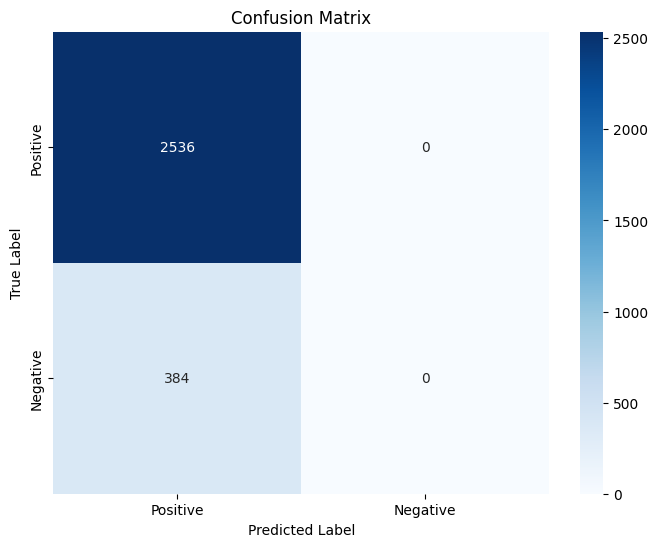

Epoch 1/10 - F1 Score: 0.4648
Epoch 2/10 - Train Loss: 0.3922, Val Loss: 0.3893
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


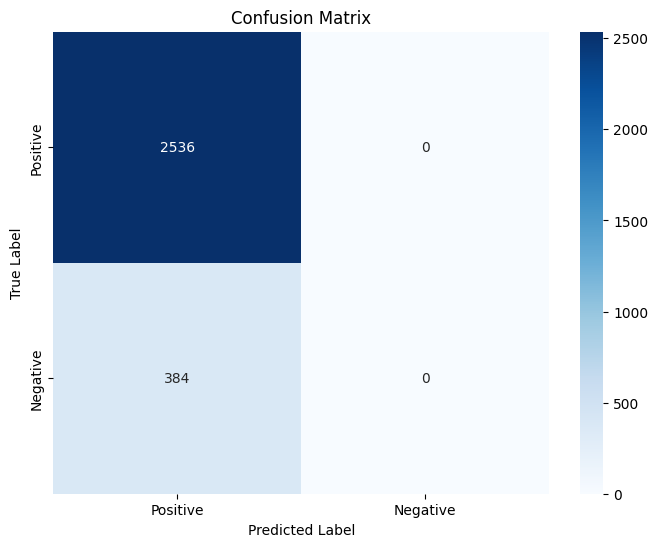

Epoch 2/10 - F1 Score: 0.4648
Epoch 3/10 - Train Loss: 0.3915, Val Loss: 0.3921
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


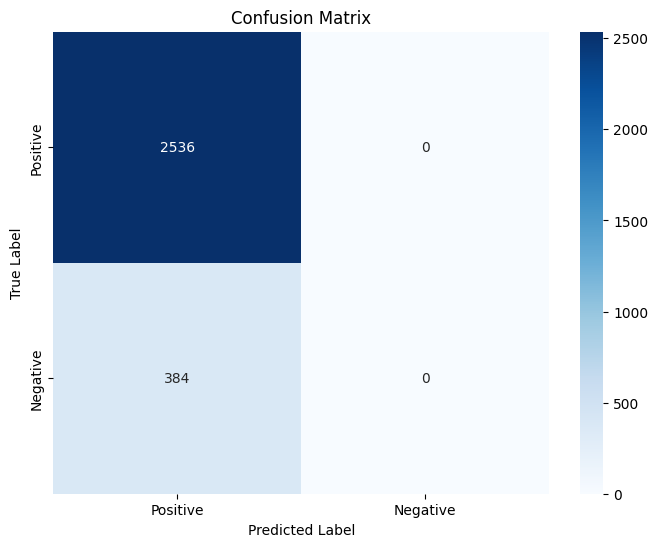

Epoch 3/10 - F1 Score: 0.4648
Epoch 4/10 - Train Loss: 0.3928, Val Loss: 0.3897
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


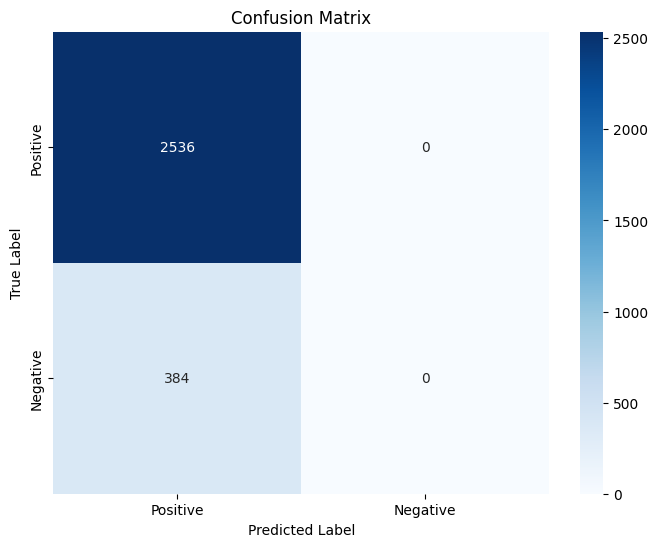

Epoch 4/10 - F1 Score: 0.4648
Epoch 5/10 - Train Loss: 0.3918, Val Loss: 0.3893
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


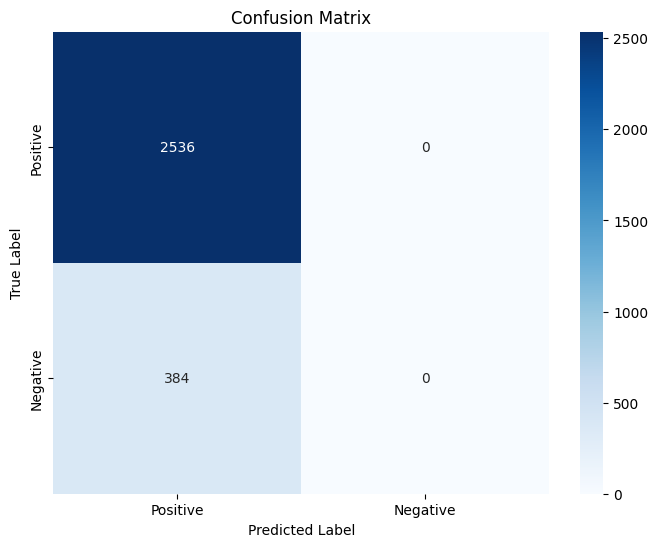

Epoch 5/10 - F1 Score: 0.4648
Epoch 6/10 - Train Loss: 0.3907, Val Loss: 0.3933
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


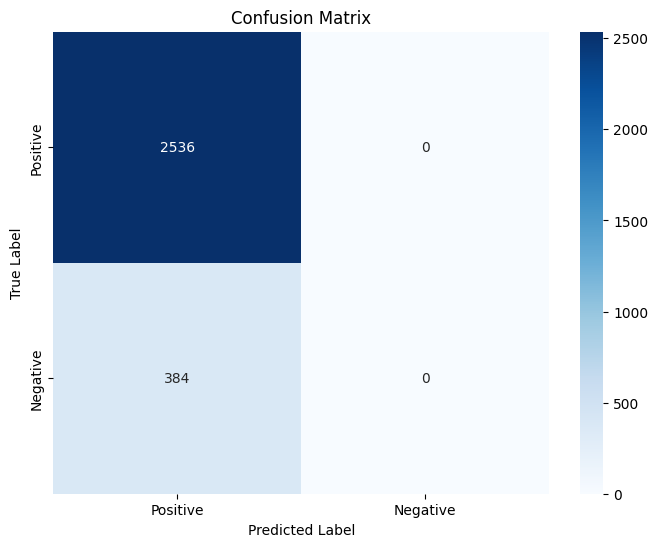

Epoch 6/10 - F1 Score: 0.4648
Epoch 7/10 - Train Loss: 0.3925, Val Loss: 0.3914
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


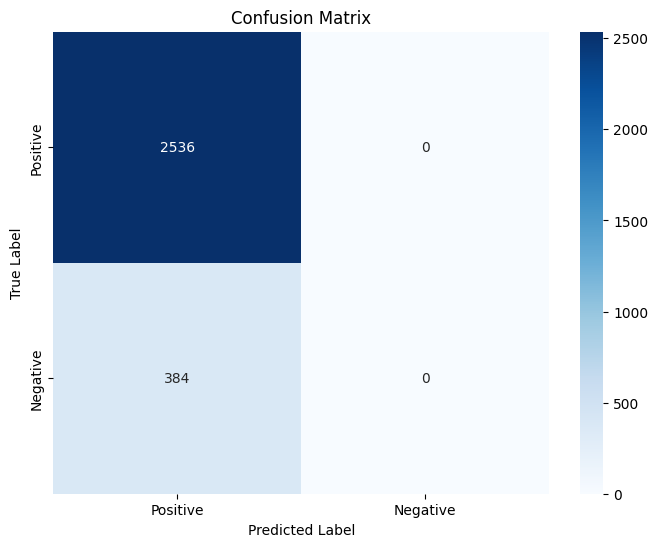

Epoch 7/10 - F1 Score: 0.4648
Epoch 8/10 - Train Loss: 0.3901, Val Loss: 0.3908
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


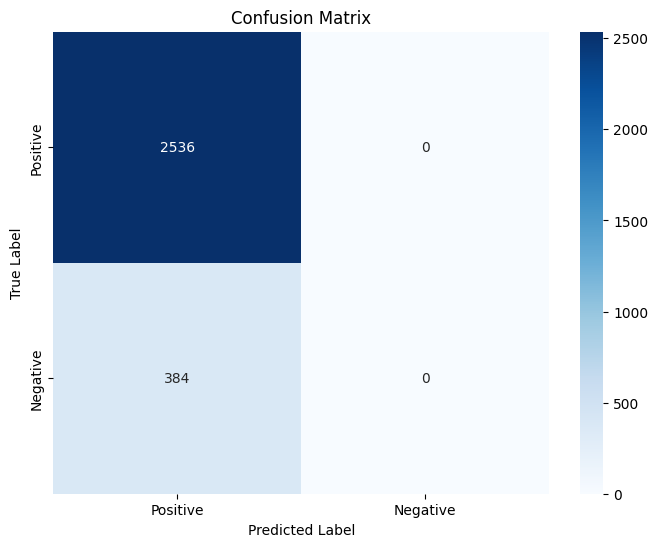

Epoch 8/10 - F1 Score: 0.4648
Epoch 9/10 - Train Loss: 0.3912, Val Loss: 0.3901
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


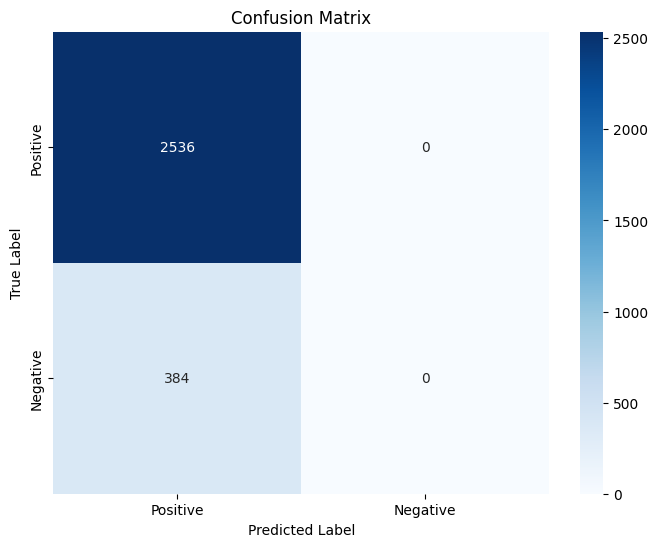

Epoch 9/10 - F1 Score: 0.4648
Epoch 10/10 - Train Loss: 0.3915, Val Loss: 0.3896
Accuracy: 0.8685
Recall (Macro): 0.5000
Precision (Macro): 0.4342
F1 Score (Macro): 0.4648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


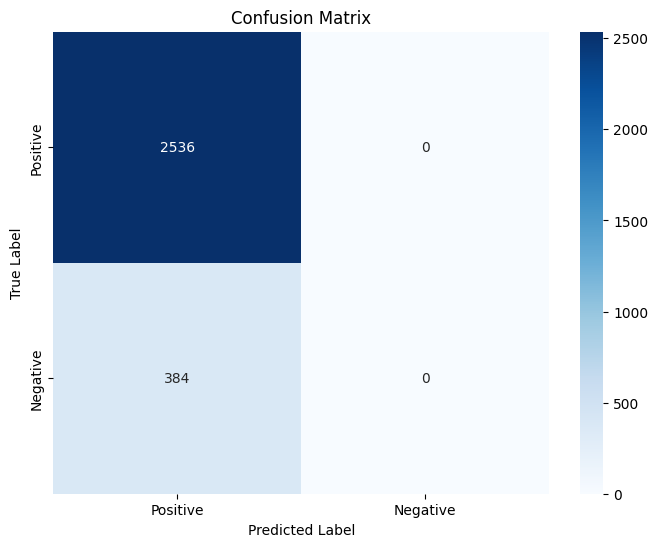

Epoch 10/10 - F1 Score: 0.4648


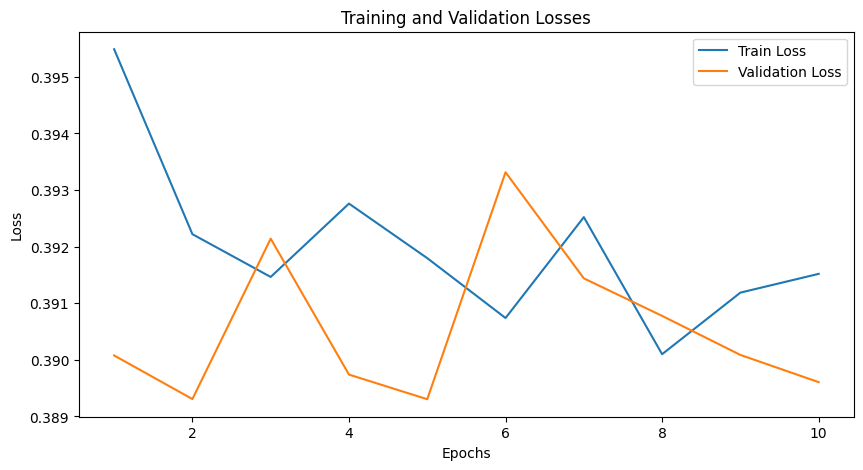

Model saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/model/2312516/Model_Gen/model.pth


In [ ]:
#Usage example, specifying the preprocessed_dir explicitly:
train_LSTM(
    '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/train.csv',
    '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/valid.csv',
    '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis',

)

Testing to see if the data is stored correctly

Sample Training Padded Sentence: [2326, 1, 801, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Corresponding Label: 0.0
Sample Validation Padded Sentence: [328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

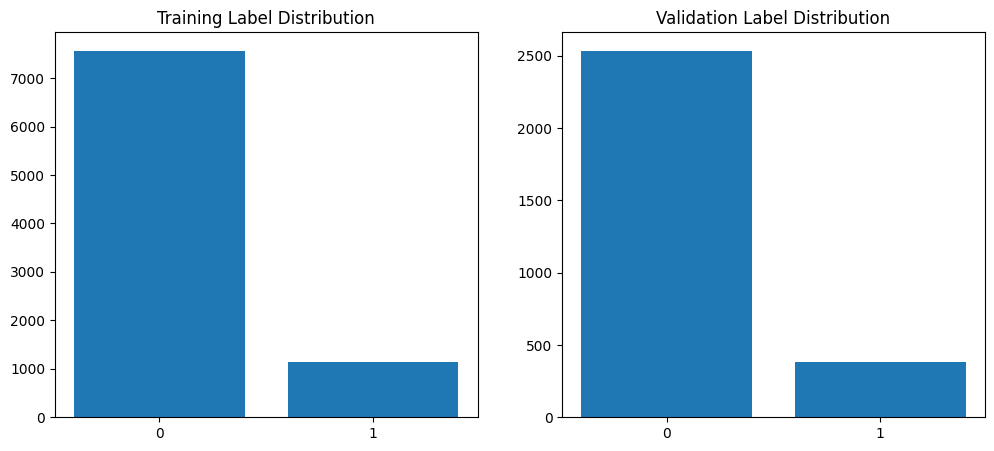

All training sentences are the same length: True
All validation sentences are the same length: True
First few words of first training sentence: female _UNK india _UNK
[('_PAD', 0), ('_UNK', 1), ('article', 2), ('page', 3), ('wikipedia', 4), ('please', 5), ('would', 6), ('one', 7), ('like', 8), ('dont', 9), ('source', 10), ('see', 11), ('also', 12), ('know', 13), ('think', 14), ('im', 15), ('people', 16), ('time', 17), ('edit', 18), ('talk', 19), ('make', 20), ('use', 21), ('may', 22), ('thanks', 23), ('get', 24), ('say', 25), ('even', 26), ('link', 27), ('user', 28), ('need', 29), ('name', 30), ('good', 31), ('information', 32), ('hi', 33), ('well', 34), ('deletion', 35), ('want', 36), ('could', 37), ('way', 38), ('editor', 39), ('thing', 40), ('editing', 41), ('first', 42), ('comment', 43), ('edits', 44), ('fact', 45), ('section', 46), ('help', 47), ('point', 48), ('go', 49)]
Index of 'foeticide': None


In [ ]:

# Function to load data
def load_data(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)

# Load the data
train_padded = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/train_padded_sentences.pkl')
val_padded = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/val_padded_sentences.pkl')
train_labels = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/train_labels.pkl')
val_labels = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/val_labels.pkl')
word2idx = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/word2idx.pkl')
idx2word = load_data('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/idx2word.pkl')

# Display basic stats
print("Sample Training Padded Sentence:", train_padded[0])
print("Corresponding Label:", train_labels[0])
print("Sample Validation Padded Sentence:", val_padded[0])
print("Corresponding Label:", val_labels[0])

# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(train_labels, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
axes[0].set_title('Training Label Distribution')
axes[0].set_xticks([0, 1])
axes[1].hist(val_labels, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
axes[1].set_title('Validation Label Distribution')
axes[1].set_xticks([0, 1])
plt.show()

# Check if all sentences are padded to the same length
train_lengths = [len(sentence) for sentence in train_padded]
val_lengths = [len(sentence) for sentence in val_padded]
print("All training sentences are the same length:", len(set(train_lengths)) == 1)
print("All validation sentences are the same length:", len(set(val_lengths)) == 1)

# Print some words using idx2word to check correctness
print("First few words of first training sentence:", ' '.join([idx2word[idx] for idx in train_padded[0] if idx != 0][:10]))
# After finalizing the vocabulary...
print(list(word2idx.items())[:50])  # Print the first 50 word-index pairs
print("Index of 'foeticide':", word2idx.get('foeticide'))



# **LSTM Model**

**USE CUDA**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device} in training models.')

Using cuda in training models.


In [ ]:


class NLP(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initializes the NLP model, a neural network for sentiment analysis using LSTM layers.

        Args:
            vocab_size (int): The number of unique tokens in the data (size of the vocabulary).
            (might change this don't forget to edit comment) output_size (int): The number of classes in the output (e.g., 2 for binary classification).
            embedding_dim (int): The dimensionality of the embedding layer.
            hidden_dim (int): The number of features in the hidden state of the LSTM.
            n_layers (int): The number of LSTM layers stacked in the network.
            drop_prob (float): The dropout probability (to avoid overfitting).
        """
        super(NLP, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # Embedding layer converts token indices to embeddings
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer definitions
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(drop_prob)

        # Fully connected layer that maps from hidden state space to output space
        self.fc = nn.Linear(hidden_dim, output_size)

        # Sigmoid activation function to convert output to a probability
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Defines the forward pass of the model.

        Args:
            x (Tensor): Input data (batch of token indices).
            hidden (tuple): The initial hidden state for the LSTM layer.

        Returns:
            Tuple[Tensor, Tensor]: Output after sigmoid activation (probabilities) and the new hidden state.
        """
        batch_size = x.size(0)

        # Embedding layer
        x = x.long()
        embeds = self.embedding(x)

        # LSTM layer
        lstm_out, hidden = self.lstm(embeds, hidden)

        # Prepare the output of the LSTM layer for the fully connected layer
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # Dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)

        # Reshape to be batch size first
        out = out.view(batch_size, -1)
        out = out[:, -1]  # Get the last batch of labels

        return out, hidden

    def init_hidden(self, batch_size):
        """
        Initializes hidden state.

        Args:
            batch_size (int): The size of batches.

        Returns:
            Tuple[Tensor, Tensor]: Initial hidden state and cell state for the LSTM layer.
        """
        # Create new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state
        weight = next(self.parameters()).data
        hidden = (weight.new_zeros(self.n_layers, batch_size, self.hidden_dim),
                  weight.new_zeros(self.n_layers, batch_size, self.hidden_dim))
        return hidden







# Training Using the LSTM Model

In [ ]:

def train_model(model, train_loader, val_loader, device, epochs=10):
    """
    Train and validate a PyTorch model using given DataLoaders for training and validation data.

    Args:
        model (torch.nn.Module): The neural network model to be trained.
        train_loader (DataLoader): DataLoader for the training dataset.
        val_loader (DataLoader): DataLoader for the validation dataset.
        device (torch.device): Device to perform the training on ('cuda' or 'cpu').
        epochs (int): Number of full passes over the dataset.

    Returns:
        None: This function prints the training and validation losses and F1 scores for each epoch,
              and plots the training and validation loss curves.
    """

    # Setup the optimizer and the loss function
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification tasks

    # Lists to store losses per epoch for plotting
    train_losses = []
    val_losses = []

    # Loop over the dataset multiple times
    for epoch in range(epochs):
        model.train()  # Set model to training mode (important for certain layers like dropout)

        running_loss = 0.0
        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the correct device

            optimizer.zero_grad()  # Zero the parameter gradients to prevent accumulation

            # Forward pass
            outputs, _ = model(inputs, model.init_hidden(inputs.size(0)))  # Get model outputs and new hidden state
            loss = criterion(outputs.squeeze(), labels)  # Calculate loss
            loss.backward()  # Backpropagate the error
            optimizer.step()  # Update model parameters

            running_loss += loss.item() * inputs.size(0)  # Aggregate the loss

        # Calculate average losses for the current epoch
        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode (important for certain layers like dropout)
        val_running_loss = 0.0
        all_preds = []
        all_true = []
        with torch.no_grad():  # Disabling gradient calculation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs, _ = model(inputs, model.init_hidden(inputs.size(0)))
                loss = criterion(outputs.squeeze(), labels)
                val_running_loss += loss.item() * inputs.size(0)

                # Predictions for metrics
                predicted = torch.round(outputs.squeeze())
                all_preds.extend(predicted.cpu().numpy())
                all_true.extend(labels.cpu().numpy())

        val_loss = val_running_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        # Print training/validation statistics
        print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        # Compute performance metrics after each epoch
        f1 = compute_performance(all_true, all_preds)
        print(f'Epoch {epoch + 1}/{epochs} - F1 Score: {f1:.4f}')

    # Plotting training and validation losses outside the loop after all epochs are done
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()








# Save Model LSTM

In [ ]:

def save_model_LSTM(model, model_dir, filename="model.pth"):
    """
    Saves the model's state dictionary to a specified directory.

    Args:
        model (torch.nn.Module): The model to save.
        model_dir (str): The directory where the model will be saved.
        filename (str): The filename for the saved model.
    """
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_path = os.path.join(model_dir, filename)
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")


## Testing Method LSTM
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:

def load_model_LSTM(model_path, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob):
    """
    Loads a saved model from disk, ensuring it is loaded to the appropriate device,
    even if the original saving device was CUDA-enabled and the current device is not.

    Args:
        model_path (str): The file path where the model is saved.
        vocab_size (int): The number of unique tokens in the model's vocabulary.
        output_size (int): The number of output classes or features in the model.
        embedding_dim (int): The size of each embedding vector.
        hidden_dim (int): The number of features in the hidden state of the LSTM layers.
        n_layers (int): The number of LSTM layers in the model.
        drop_prob (float): The dropout probability used in the model.

    Returns:
        torch.nn.Module: The loaded model ready for inference.
    """
    # Define the device to load the model onto
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the model state dictionary with map_location to ensure it loads onto the correct device
    # This checks if CUDA is available and if not, maps all tensors to CPU
    state_dict = torch.load(model_path, map_location=device)

    # Assuming NLP is defined in the same script or imported
    model = NLP(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob)
    model.load_state_dict(state_dict)
    model.to(device)  # Move model to the appropriate device
    model.eval()

    return model


In [ ]:

def test_LSTM(test_file, model_dir, model_filename="model.pth", output_file=None):
    """
    Load a trained model and predict labels for the test dataset.
    Updates the 'out_label_model_Gen' column in a new test CSV file with predictions.

    Args:
        test_file (str): Path to the test file.
        model_dir (str): Directory where the model is saved.
        model_filename (str): Filename of the saved model.
        output_file (str): Optional; path to the output file where the updated CSV will be saved.
    """
    # Load the vocabulary
    vocab_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/word2idx.pkl'
    with open(vocab_path, 'rb') as f:
        word2idx = pickle.load(f)

    # Initialize the text processing pipeline
    pipeline = TextProcessingPipeline()
    pipeline.word2idx = word2idx
    pipeline.idx2word = {i: w for w, i in word2idx.items()}  # Assuming this needs to be populated

    # Load the test data
    test_df = pd.read_csv(test_file)
    test_comments = test_df['comment'].tolist()

    # Clean and tokenize test data
    test_cleaned_comments = [pipeline.clean_text(comment) for comment in test_comments]
    test_tokenized_comments = [comment.split() for comment in test_cleaned_comments]

    # Convert sentences to indices and pad them
    test_indices = pipeline.sentences_to_indices(test_tokenized_comments)
    test_padded = pipeline.pad_sentences(test_indices, max_length=200, pad_token=word2idx.get('_PAD', 0))

    # Load the model
    model_path = os.path.join(model_dir, model_filename)
    vocab_size = len(word2idx)
    output_size = 1  # Adjust if necessary
    embedding_dim = 300
    hidden_dim = 512
    n_layers = 8
    drop_prob = 0.5
    model = load_model_LSTM(model_path, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob)

    # Convert to PyTorch tensors
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    test_tensor = torch.tensor(test_padded, dtype=torch.long).to(device)

    # Create DataLoader
    test_loader = DataLoader(test_tensor, batch_size=16, shuffle=False)

    # Predict using the model
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs in test_loader:
            outputs, _ = model(inputs, model.init_hidden(inputs.size(0)))
            predicted = torch.round(outputs.squeeze())
            predictions.extend(predicted.cpu().numpy())

    # Update the DataFrame
    test_df['out_label_model_Gen'] = predictions

    # Decide the output file path
    if output_file is None:
        output_file = os.path.join(model_dir, test_file.split('/')[-1].replace('.csv', '_updated_LSTM.csv'))

    # Save updated DataFrame to a new CSV to keep the original intact
    test_df.to_csv(output_file, index=False)
    print("Updated predictions saved to", output_file)



In [ ]:

test_file_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test.csv'
model_directory = "/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/Model_Dis"
model_filename = "model.pth"
output_file_path = os.path.join(model_directory, "test_predictions.csv")  # Output file name and path

# Call the test function with specified output file path
test_LSTM(test_file_path, model_directory, model_filename, output_file=output_file_path)


Converting to indices: 100%|██████████| 2896/2896 [00:00<00:00, 91031.55it/s]


Updated predictions saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/model/2312516/Model_Gen/test_predictions.csv


# Method Discriminative Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Method Discriminative Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [20]:

def train_dis(train_file, val_file, model_dir):
    """
    Train and validate a logistic regression model using TF-IDF, SMOTE for balancing,
    and GridSearchCV to optimize the model parameters.
    Args:
        train_file (str): Path to the training CSV file.
        val_file (str): Path to the validation CSV file.
        model_dir (str): Directory to save the trained model.
    """
    # Ensure the model directory exists
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
        print(f"Directory '{model_dir}' created successfully.")

    # Load training and validation data
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    # Handle missing values: Option to fill with a placeholder text or drop rows
    train_df['Cleaned_Sentence'].fillna('Missing', inplace=True)
    val_df['Cleaned_Sentence'].fillna('Missing', inplace=True)

    # Prepare the data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_df['Cleaned_Sentence'])
    y_train = train_df['Label'].values
    X_val = vectorizer.transform(val_df['Cleaned_Sentence'])
    y_val = val_df['Label'].values

    # Setup the pipeline with SMOTE and Logistic Regression
    pipeline = make_pipeline(SMOTE(random_state=student_id), LogisticRegression(max_iter=1000))

    # Setup the parameter grid
    param_grid = {
        'logisticregression__C': [0.01, 0.1, 1, 10, 100],
        'logisticregression__class_weight': [None, 'balanced']  # Additional tuning for class weight
    }

    # Define GridSearchCV
    clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=10, verbose=1)

    # Train the model using grid search
    clf.fit(X_train, y_train)

    # Print best parameter and model score
    print(f"Best parameters: {clf.best_params_}")
    print(f"Best model score (F1 macro): {clf.best_score_}")

    # Validate the model
    y_val_pred = clf.predict(X_val)
    compute_performance(y_val, y_val_pred)

    # Add predictions to validation dataframe and save it
    val_df['Predicted_Label'] = y_val_pred
    predictions_file_path = os.path.join(model_dir, 'validation_predictions.csv')
    val_df.to_csv(predictions_file_path, index=False)
    print(f"Validation predictions saved to {predictions_file_path}")

    # Prepare the model object by selecting the best estimator from GridSearch
    best_model_path = os.path.join(model_dir, 'logistic_regression_model.pkl')
    joblib.dump(clf.best_estimator_, best_model_path)

    # Save the TF-IDF vectorizer
    vectorizer_file_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')
    joblib.dump(vectorizer, vectorizer_file_path)


    # Now use save_model to save the model officially
    final_model_path = save_model(clf.best_estimator_, model_dir)

    print(f'Model and vectorizer saved to {model_dir}')

    # Model is working fine, so save model
    save_model(pipeline,model_dir)

    # Now Zip Model to share it
    zip_directory(model_dir, MODEL_Dis_File)

    model_gdrive_link = get_gdrive_link(MODEL_Dis_File)

    print(model_gdrive_link)
    shareable_link = get_shareable_link(model_gdrive_link)

    return final_model_path, model_gdrive_link


    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
# return model_gdrive_link

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 100, 'logisticregression__class_weight': None}
Best model score (F1 macro): 0.5105949550219868
Accuracy: 0.7753
Recall (Macro): 0.5160
Precision (Macro): 0.5155
F1 Score (Macro): 0.5157


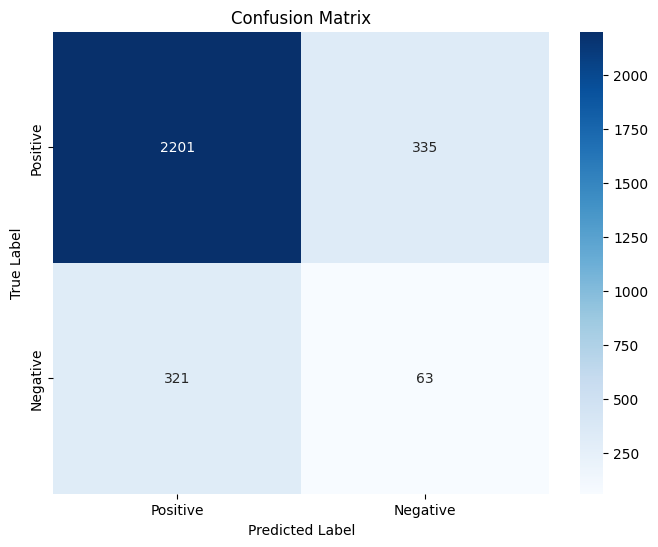

Validation predictions saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis/validation_predictions.csv
Directory '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis' already exists.
Saved model to  /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis/model.sav
Model and vectorizer saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis
Directory '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis' already exists.
Saved model to  /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis/model.sav
Created a zip file gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis.zip
https://drive.google.com/file/d/1glMzy6Vdk8xWjSpedM1kCH9RyCPVM-oJ/view?usp=sharing


('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis/model.sav',
 'https://drive.google.com/file/d/1glMzy6Vdk8xWjSpedM1kCH9RyCPVM-oJ/view?usp=sharing')

In [21]:
# Try the training function
train_dis('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/preprocessed_train_text.csv',
          '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/preprocessed_data/preprocessed_val_text.csv',
          '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis')

## Testing Method Discriminative Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

# Test Logistic Regression

In [16]:

def test_dis(test_file, model_dir, output_file= None, MODEL_PATH= None, model_gdrive_link= None):
    """
    Load a trained logistic regression model and TF-IDF vectorizer, predict labels for the test dataset,
    and save the updated test dataset with the 'out_label_model_dis' column updated with the predictions.

    Args:
        test_file (str): Path to the test CSV file.
        model_dir (str): Directory where the model and vectorizer are saved.
        output_file (str): Path to save the output CSV file with predictions. If None, updates the test_file directly.
    """

    # Initialize the text processing pipeline
    pipeline = TextProcessingPipeline()

    # Load and clean the test data
    comments = pipeline.load_data_test(test_file)
    cleaned_comments = [pipeline.clean_text(comment) for comment in comments]
    test_df = pd.DataFrame(cleaned_comments, columns=['comment'])

    # Load the trained model and vectorizer
    model_path = os.path.join(model_dir, 'logistic_regression_model.pkl')
    vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')

    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)

    # Load the test data
    test_df = pd.read_csv(test_file)

    # Handle missing comments by filling with a placeholder text 'Missing'
    test_df['comment'].fillna('Missing', inplace=True)

    # Transform the test data using the loaded vectorizer
    X_test = vectorizer.transform(test_df['comment'])

    # Predict using the loaded model
    predictions = model.predict(X_test)
    test_df['out_label_model_Dis'] = predictions  # Update the predictions column

    # Decide where to save the output file
    if output_file is None:
        output_file = test_file  # Overwrite the original file

    # Save the updated DataFrame
    test_df.to_csv(output_file, index=False)
    print(f"Updated predictions saved to {output_file}")

In [18]:
# Test file, model directory, and output file paths
test_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test.csv'
model_dir = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis'
output_file = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test_updated.csv'
# model_gdrive_link = 'https://drive.google.com/file/d/1glMzy6Vdk8xWjSpedM1kCH9RyCPVM-oJ/view?usp=sharing'

# Call the test_dis function
test_dis(test_file, model_dir = model_dir, output_file = output_file)


Updated predictions saved to /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test_updated.csv


# Merge the two predictions

In [19]:
# Load the CSV files
test_predictions_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen/test.csv'
test_updated_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/test_updated.csv'

test_predictions_df = pd.read_csv(test_predictions_path)
test_updated_df = pd.read_csv(test_updated_path)

# Focus on selecting the correct columns before merging
# Specifically ensuring only the required 'out_label_model_Gen' from predictions and 'out_label_model_Dis' from updated are used
test_predictions_df = test_predictions_df[['comment_id', 'comment', 'split', 'out_label_model_Gen']]
test_updated_df = test_updated_df[['comment_id', 'out_label_model_Dis']]

# Merge the dataframes on 'comment_id'
merged_df = pd.merge(test_predictions_df, test_updated_df, on='comment_id')

# Save to a new CSV file
output_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/Copy_of_test_final.csv'
merged_df.to_csv(output_path, index=False)

print("Merged file saved successfully.")

Merged file saved successfully.


Merging all validation/prediction files

In [1]:
import pandas as pd

def merge_model_predictions(nb_file, lr_file, intermediate_output):
    """
    Merge validation results from Naive Bayes and Logistic Regression models based on 'toxicity'.
    Args:
        nb_file (str): Path to the CSV file with Naive Bayes predictions.
        lr_file (str): Path to the CSV file with Logistic Regression predictions.
        intermediate_output (str): Path where the intermediate merged file will be saved.
    """
    # Load the CSV files
    df_nb = pd.read_csv(nb_file)
    df_lr = pd.read_csv(lr_file)

    # Standardize column names for merging
    df_nb.rename(columns={'Comment': 'comment', 'True_Label': 'toxicity', 'Predicted_Label': 'predicted_label_NB'}, inplace=True)
    df_lr.rename(columns={'Cleaned_Sentence': 'comment', 'Label': 'toxicity', 'Predicted_Label': 'predicted_label_LR'}, inplace=True)

    # Merge the datasets on 'toxicity'
    merged_df = pd.merge(df_nb, df_lr, on='toxicity', how='inner')

    # Save the intermediate results
    merged_df.to_csv(intermediate_output, index=False)
    print(f"Intermediate merge file saved successfully at {intermediate_output}")

def merge_with_validation(intermediate_file, valid_file, final_output):
    """
    Merge intermediate merged results with the main validation dataset based on 'toxicity'.
    Args:
        intermediate_file (str): Path to the intermediate merged CSV file.
        valid_file (str): Path to the validation dataset CSV file.
        final_output (str): Path where the final merged file will be saved.
    """
    # Load the intermediate results and the validation data
    intermediate_df = pd.read_csv(intermediate_file)
    df_valid = pd.read_csv(valid_file)

    # Standardize column names if necessary
    df_valid.rename(columns={'comment': 'comment_valid', 'toxicity': 'toxicity'}, inplace=True)

    # Merge the datasets on 'toxicity'
    final_merged_df = pd.merge(intermediate_df, df_valid, on='toxicity', how='inner')

    # Save the final merged results
    final_merged_df.to_csv(final_output, index=False)
    print(f"Final merged file saved successfully at {final_output}")


In [ ]:
# File paths
nb_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Gen/validation_results_NB.csv'
lr_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/model/2312516/Model_Dis/validation_predictions.csv'
valid_path = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/data/6/valid.csv'
intermediate_output = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/intermediate_merge.csv'
final_output = '/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/merged_validation_predictions.csv'

# Perform the merges
merge_model_predictions(nb_path, lr_path, intermediate_output)
merge_with_validation(intermediate_output, valid_path, final_output)


Intermediate merge file saved successfully at /content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/intermediate_merge.csv


In [6]:
# Load the CSV file focusing on the 'toxicity' column
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/CE807-24-SP/Assignment/2312516/test.csv', usecols=['out_label_model_Dis'])

# Count the total number of rows
total_rows = len(data)

# Count the number of 0s and 1s in the 'toxicity' column
toxicity_counts = data['out_label_model_Dis'].value_counts().to_dict()
total_rows, toxicity_counts

(2896, {0.0: 2738, 1.0: 158})

# Trying Roberta

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,
                             padding='max_length',
                             truncation=True,
                             max_length=2048,  # Adjust to the max_length expected by your model
                             return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        roberta_result = polarity_scores_roberta(text)
        both = {**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits.detach().numpy()
    scores = softmax(scores, axis=1)
    # Assuming the sentiment is ordered as [negative, neutral, positive]
    scores_dict = {
        'roberta_neg': scores[:, 0],
        'roberta_pos': scores[:, 2]
    }
    return scores_dict

# Load the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.eval()  # Put the model in evaluation mode

# Read the CSV file and process the text
df = pd.read_csv('/content/gdrive/MyDrive/CE807-24-SP/Assignment/preprocessed_data/preprocessed_train_text.csv')

# Initialize columns for negative and positive scores
df['roberta_neg'] = 0.0
df['roberta_pos'] = 0.0

# Loop through the DataFrame and apply the function to each piece of text
for index, row in df.iterrows():
    example = row['Cleaned_Sentence']  # Make sure this is your text column
    scores_dict = polarity_scores_roberta(example)
    df.at[index, 'roberta_neg'] = scores_dict['roberta_neg']
    df.at[index, 'roberta_pos'] = scores_dict['roberta_pos']

# Now df has the negative and positive sentiment scores



RuntimeError: The expanded size of the tensor (2048) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2048].  Tensor sizes: [1, 514]

## Discriminative Method  End


# Testing models using the main function

# Other Method/model Start

In [29]:
import argparse

In [30]:
# Define argparse-like function
def parse_arguments(option):
    parser = argparse.ArgumentParser(description='Process some integers.')
    parser.add_argument('--option', '-o',  type=str, default=option, help='Description of your option.')
    args = parser.parse_args(args=[])
    return args

# Function to perform some action based on selected option
def perform_action(option):
    print("Performing action with option:", option)

    if option == '0':
      print('\n Okay Exiting!!! ')

    elif option == '1':
      print('\n Training Generative Model')
      model_gdrive_link = train_Gen(train_file,val_file,MODEL_Gen_DIRECTORY)
      print('Make sure to pass model URL in Testing',model_gdrive_link)

    elif option == '2':
      print('\n\n Pass the URL Not Variable !!!')
      print('\n Testing Generative Model')
      model_gen_url = ''
      test_Gen(test_file, model_gen_url)

    elif option == '3':
      print('\n Training Disciminative Model')
      model_gdrive_link = train_dis(train_file,val_file,MODEL_Dis_DIRECTORY)
      print('Make sure to pass model URL in Testing',model_gdrive_link)
      print('\n\n Pass the URL Not Variable !!!')

    elif option == '4':
      print('\n\n Pass the URL Not Variable !!!')
      print('\n Testing Disciminative Model')
      model_dis_url = 'https://drive.google.com/file/d/1--sJNJMLFvAz77HjiB8is8DDHOfY0FBG/view?usp=sharing'
      test_dis(test_file, MODEL_PATH, model_dis_url)

    else:
      print('Wrong Option Selected. \n\nPlease select Correct option')
      main()


def main():

    # Get option from user input
    user_option = input("0. To Exit Code\n"
                     "1. Train Model Generative\n"
                    "2. Test Model Generative\n"
                    "3. Train Model Discriminative\n"
                    "4. Test Model Discriminative\n"
                    "Enter your option: ")

    args = parse_arguments(user_option)
    option = args.option
    perform_action(option)


In [ ]:
main()

0. To Exit Code
1. Train Model Generative
2. Test Model Generative
3. Train Model Discriminative
4. Test Model Discriminative
Enter your option: 4
Performing action with option: 4


 Pass the URL Not Variable !!!

 Testing Disciminative Model

 Start by downloading model
File downloaded successfully! gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test.zip
Model downloaded to gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test.zip
Extracted a zip file to gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/

 Model is downloaded to  gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/

 Data is loaded from  gdrive/MyDrive/./CE807-24-SP/Lab10/data/0/test.csv
Loaded model from  gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/Model_Dis/model.sav

 Output is save in  gdrive/MyDrive/./CE807-24-SP/Lab10/data/0/test.csv


In [ ]:
model_dis_url = 'https://drive.google.com/file/d/1--sJNJMLFvAz77HjiB8is8DDHOfY0FBG/view?usp=sharing'
test_dis(test_file, MODEL_PATH, model_dis_url)


 Start by downloading model
File downloaded successfully! gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test.zip
Model downloaded to gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test.zip
Extracted a zip file to gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/

 Model is downloaded to  gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/

 Data is loaded from  gdrive/MyDrive/./CE807-24-SP/Lab10/data/0/test.csv
Loaded model from  gdrive/MyDrive/./CE807-24-SP/Lab10/model/12345670/test/Model_Dis/model.sav

 Output is save in  gdrive/MyDrive/./CE807-24-SP/Lab10/data/0/test.csv


'gdrive/MyDrive/./CE807-24-SP/Lab10/data/0/test.csv'

##Other Method/model End